# CHAPTER 4 
# NumPy Basics: Arrays and Vectorized Computation

在数值计算领域，说Numpy是python最重要的包也不为过。在numpy中有下面这些东西：

- ndarray, 一个有效的多维数组，能提供以数组为导向的快速数值计算和灵活的广播功能（broadcasting）

- 便利的数学函数

- 用于读取/写入(reading/writing)数据到磁盘的便利工具

- 线性代数，随机数生成，傅里叶变换能力

- 可以用C API来写C，C++，或FORTRAN

通过学习理解numpy中数组和数组导向计算，能帮我们理解pandas之类的工具。

# 4.1 The NumPy ndarray: A Multidimensional Array Object（ndarray: 多维数组对象）

N-dimensional array object（n维数组对象）, or ndarray，这是numpy的关键特征。先来尝试一下，生成一个随机数组：

In [1]:
import numpy as np

In [2]:
# Generate some random data
data = np.random.randn(2, 3)

In [3]:
data

array([[ 1.1187614 ,  0.50618059,  0.0978787 ],
       [-0.87462281, -0.10235648, -1.1358389 ]])

进行一些数学运算：

In [4]:
data * 10

array([[ 11.18761399,   5.0618059 ,   0.97878703],
       [ -8.74622812,  -1.02356475, -11.35838899]])

In [5]:
data + data

array([[ 2.2375228 ,  1.01236118,  0.19575741],
       [-1.74924562, -0.20471295, -2.2716778 ]])

每一个数组都有一个shape，来表示维度大小。而dtype，用来表示data type：

In [6]:
data.shape

(2, 3)

In [7]:
data.dtype

dtype('float64')

# 1 Greating ndarrays (创建n维数组)

最简单的方法使用array函数，输入一个序列即可，比如list：

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列能被转换为多维数组：

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

因为data2是一个list of lists, 所以arr2维度为2。我们能用ndim和shape属性来确认一下：

In [10]:
arr2.ndim

2

In [11]:
arr2.shape

(2, 4)

除非主动声明，否则np.array会自动给data搭配适合的类型，并保存在dtype里：

In [12]:
arr1.dtype

dtype('float64')

In [13]:
arr2.dtype

dtype('int64')

除了np.array，还有一些其他函数能创建数组。比如zeros,ones,另外还可以在一个tuple里指定shape：

In [14]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [16]:
np.empty((2, 3, 2))

array([[[-1.49166815e-154, -1.29074179e-231],
        [ 2.96439388e-323,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000]],

       [[-1.49166815e-154, -1.49166815e-154],
        [ 1.52410880e-052,  1.51978872e-047],
        [ 3.99910963e+252,  8.34402697e-309]]])

np.empty并不能保证返回所有是0的数组，某些情况下，会返回为初始化的垃圾数值，比如上面。

arange是一个数组版的python range函数：

In [17]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

这里是一些创建数组的函数：
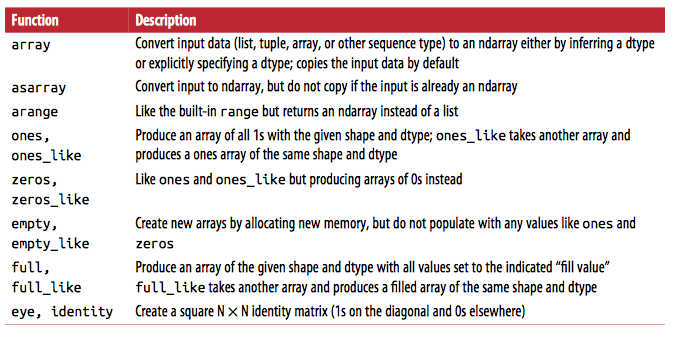

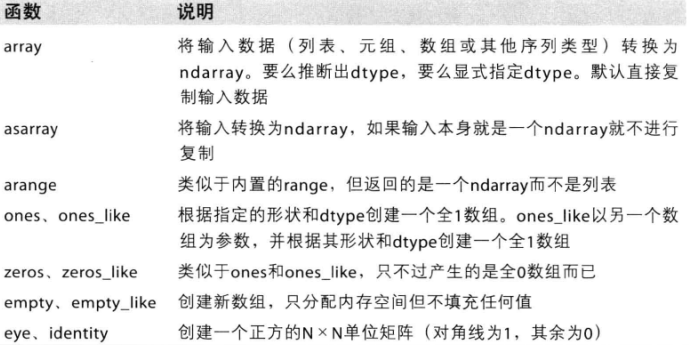

# 2 Data Types for ndarrays

dtype保存数据的类型：

In [18]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [19]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [20]:
arr1.dtype

dtype('float64')

In [21]:
arr2.dtype

dtype('int32')

dtype才是numpy能灵活处理其他外界数据的原因。

类型表格：
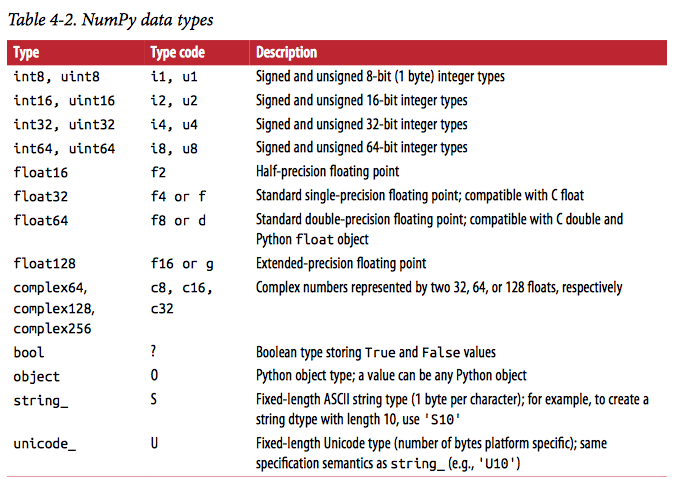

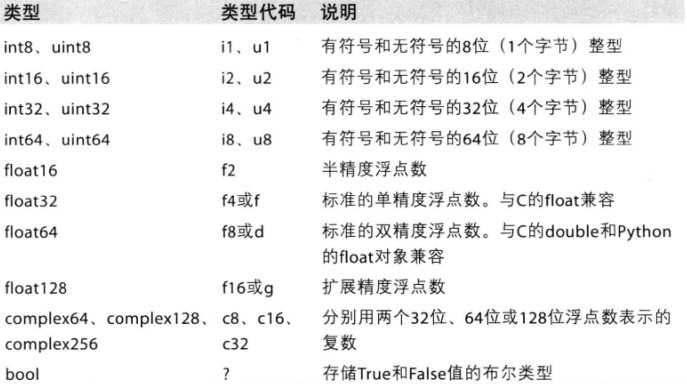

可以用astype来转换类型：

In [22]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [23]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

上面是把int变为float。如果是把float变为int，小数点后的部分会被丢弃：

In [24]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [25]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

还可以用astype把string里的数字变为实际的数字：

In [26]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [27]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

要十分注意`numpy.string_`类型，这种类型的长度是固定的，所以可能会直接截取部分输入而不给警告。

如果转换（casting）失败的话，会给出一个ValueError提示。

可以用其他数组的dtype直接来制定类型：

In [28]:
int_array = np.arange(10)

calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [29]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

还可以利用类型的缩写，比如u4就代表unit32：

In [30]:
empty_unit32 = np.empty(8, dtype='u4')
empty_unit32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

记住，astype总是会返回一个新的数组

# 3 Arithmetic with NumPy Arrays（数组计算）

数组之所以重要，是因为不用写for循环就能表达很多操作，这种特性叫做vectorization(向量化)。任何两个大小相等的数组之间的运算，都是element-wise（点对点）：

In [31]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [32]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [33]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [34]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

element-wise 我翻译为点对点，就是指两个数组的运算，在同一位置的元素间才会进行运算。

这种算数操作如果涉及标量（scalar）的话，会涉及到数组的每一个元素：


In [35]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [36]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

两个数组的比较会产生布尔数组：

In [37]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [38]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

# 4 Basic Indexing and Slicing（基本的索引和切片）

一维的我们之前已经在list部分用过了，没什么不同：

In [39]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
arr[5]

5

In [41]:
arr[5:8]

array([5, 6, 7])

In [42]:
arr[5:8] = 12

In [43]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

这里把12赋给`arr[5:8]`，其实用到了broadcasted（我觉得应该翻译为广式转变）。这里有一个比较重要的概念需要区分，python内建的list与numpy的array有个明显的区别，这里array的切片后的结果只是一个views（视图），用来代表原有array对应的元素，而不是创建了一个新的array。但list里的切片是产生了一个新的list：

In [44]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

如果我们改变arr_slice的值，会反映在原始的数组arr上：

In [45]:
arr_slice[1] = 12345

In [46]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

`[:]`这个赋值给所有元素：

In [47]:
arr_slice[:] = 64

In [48]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

之所以这样设计是出于性能和内存的考虑，毕竟如果总是复制数据的话，会很影响运算时间。当然如果想要复制，可以使用copy()方法，比如`arr[5:8].copy()`

在一个二维数组里，单一的索引指代的是一维的数组：

In [49]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

有两种方式可以访问单一元素：

In [50]:
arr2d[0][2]

3

In [51]:
arr2d[0, 2]

3

我们可以把下图中的axis0看做row（行），把axis1看做column（列）：
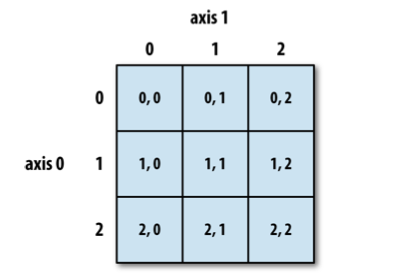

对于多维数组，如果省略后面的索引，返回的将是一个低纬度的多维数组。比如下面一个2 x 2 x 3数组：

In [53]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d.shape)
arr3d

(2, 2, 3)


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0]是一个2x3数组：

In [54]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

标量和数组都能赋给arr3d[0]:

In [55]:
old_values = arr3d[0].copy()

arr3d[0] = 42

arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [59]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

`arr3d[1, 0]`会给你一个(1, 0)的一维数组：

In [60]:
arr3d[1, 0]

array([7, 8, 9])

上面的一步等于下面的两步：

In [61]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [62]:
x[0]

array([7, 8, 9])

一定要牢记这些切片后返回的数组都是views

## Indexing with slices（用切片索引）

一维的话和python里的list没什么差别：

In [63]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [64]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

二维的话，数组的切片有点不同：

In [65]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

可以看到，切片是沿着axis 0（行）来处理的。所以，数组中的切片，是要沿着设置的axis来处理的。我们可以把arr2d[:2]理解为“选中arr2d的前两行”。

当然，给定多个索引后，也可以使用复数切片：

In [66]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [67]:
arr2d[:2, 1:] # 前两行，第二列之后

array([[2, 3],
       [5, 6]])

记住，选中的是array view。通过混合整数和切片，能做低维切片。比如，我们选中第二行的前两列：

In [68]:
arr2d[1, :2]

array([4, 5])

选中第三列的前两行：

In [69]:
arr2d[:2, 2]

array([3, 6])

冒号表示提取整个axis（轴）：

In [70]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

看图示有助于理解：
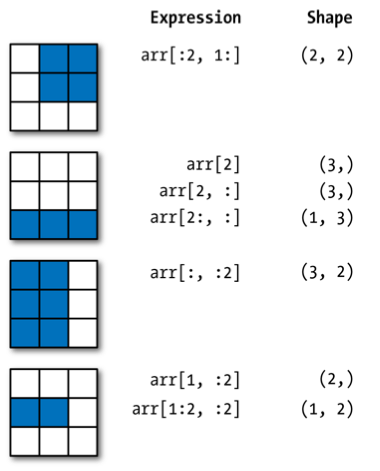

赋值也很方便：

In [71]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

# 5 Boolean Indexing (布尔索引)

假设我们的数组数据里有一些重复。这里我们用numpy.random里的randn函数来随机生成一些离散数据：

In [72]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [73]:
data = np.random.randn(7, 4)
data

array([[-1.37289033, -0.6261813 , -0.13406405, -1.33021755],
       [-1.31256336, -0.10067834, -0.10905631,  0.57079119],
       [-1.11776961,  0.00565177, -0.79602035, -0.50462535],
       [ 0.71660104, -1.03799967, -0.95203577, -0.8866893 ],
       [-1.19032895, -0.77851896,  0.69265083,  0.41354779],
       [ 0.75346048,  0.21838899,  1.51996949,  0.9861722 ],
       [ 0.88781273,  1.34373124, -1.57216458, -0.76436943]])

假设每一个name对应data数组中的一行，我们想要选中name为'Bob'的所有行。就像四则运算，用比较运算符（==）：

In [74]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

然后用这个布尔数组当做索引：

In [76]:
data[names == 'Bob']

array([[-1.37289033, -0.6261813 , -0.13406405, -1.33021755],
       [ 0.71660104, -1.03799967, -0.95203577, -0.8866893 ]])

注意：布尔数组和data数组的长度要一样。

我们可以选中names=='Bob'的行，然后索引列：

In [77]:
data[names == 'Bob', 2:]

array([[-0.13406405, -1.33021755],
       [-0.95203577, -0.8866893 ]])

In [78]:
data[names == 'Bob', 3]

array([-1.33021755, -0.8866893 ])

选中除了'Bob'外的所有行，可以用`!=`或者`~`：

In [79]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [80]:
data[~(names == 'Bob')]

array([[-1.31256336, -0.10067834, -0.10905631,  0.57079119],
       [-1.11776961,  0.00565177, -0.79602035, -0.50462535],
       [-1.19032895, -0.77851896,  0.69265083,  0.41354779],
       [ 0.75346048,  0.21838899,  1.51996949,  0.9861722 ],
       [ 0.88781273,  1.34373124, -1.57216458, -0.76436943]])

当想要反转一个条件时，用`~`操作符很方便：

In [81]:
cond = names == 'Bob'

In [82]:
data[~cond]

array([[-1.31256336, -0.10067834, -0.10905631,  0.57079119],
       [-1.11776961,  0.00565177, -0.79602035, -0.50462535],
       [-1.19032895, -0.77851896,  0.69265083,  0.41354779],
       [ 0.75346048,  0.21838899,  1.51996949,  0.9861722 ],
       [ 0.88781273,  1.34373124, -1.57216458, -0.76436943]])

选中2个或3个名字，组合多个布尔条件，用布尔运算符&，|，另外python中的关键词and和or不管用：

In [83]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [84]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [85]:
data[mask]

array([[-1.37289033, -0.6261813 , -0.13406405, -1.33021755],
       [-1.11776961,  0.00565177, -0.79602035, -0.50462535],
       [ 0.71660104, -1.03799967, -0.95203577, -0.8866893 ],
       [-1.19032895, -0.77851896,  0.69265083,  0.41354779]])

用布尔索引总是会返回一份新创建的数据，原本的数据不会被改变。

更改值的方式也很直觉。比如我们想让所有负数变为0：

In [86]:
data[data < 0] = 0

In [87]:
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.57079119],
       [0.        , 0.00565177, 0.        , 0.        ],
       [0.71660104, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.69265083, 0.41354779],
       [0.75346048, 0.21838899, 1.51996949, 0.9861722 ],
       [0.88781273, 1.34373124, 0.        , 0.        ]])

用一维的布尔数组也能更改所有行或列：

In [88]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [89]:
data[names != 'Joe'] = 7

In [90]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.57079119],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.75346048, 0.21838899, 1.51996949, 0.9861722 ],
       [0.88781273, 1.34373124, 0.        , 0.        ]])

# 6 Fancy Indexing(花式索引)

通过整数数组来索引。假设我们有一个8 x 4的数组：

In [91]:
arr = np.empty((8, 4))

In [92]:
for i in range(8):
    arr[i] = i

In [93]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

想要按一定顺序选出几行，可以用一个整数list或整数ndarray来指定顺序：

In [94]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

用符号来从后选择row：

In [95]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

用多维索引数组，能选出由一维数组中的元素，通过在每个tuple中指定索引：

In [96]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [97]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

可以看到`[ 4, 23, 29, 10]`分别对应`(1, 0), (5, 3), (7, 1), (2, 2)`。不论数组有多少维，fancy indexing的结果总是一维。

对于长方形区域，有下面的方法来截取：

In [98]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

上面的意思是，先从arr中选出[1, 5, 7, 2]这四行：

    array([[ 4,  5,  6,  7],
           [20, 21, 22, 23],
           [28, 29, 30, 31],
           [ 8,  9, 10, 11]])
           
然后[:, [0, 3, 1, 2]]表示选中所有行，但是列的顺序要按0,3,1,2来排。于是得到：

    array([[ 4,  7,  5,  6],
           [20, 23, 21, 22],
           [28, 31, 29, 30],
           [ 8, 11,  9, 10]])
           
要记住，fancy indexing和切片不同，得到的是一个新的array。

# 7 Transposing Arrays and Swapping Axes（数组转置和轴交换）

转置也是返回一个view，而不是新建一个数组。有两种方式，一个是transpose方法，一个是T属性：

In [99]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [100]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

做矩阵计算的时候，这个功能很常用，计算矩阵乘法的时候，用np.dot:

In [101]:
arr = np.arange(8).reshape((4, 2))
print(arr.T)
print(arr)

[[0 2 4 6]
 [1 3 5 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [102]:
np.dot(arr.T, arr)

array([[56, 68],
       [68, 84]])

上面的例子是 (2x4) x (4x2) = (2x2)。得到的结果是2x2维，就是普通的矩阵乘法。

对于多维数组，transpose会接受由轴数字组成的tuple，来交换轴：

In [103]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [104]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

这里，secode axis(1)被设为第一个，first axis(0)第二个，最后的axis没边。

使用`.T`来转置swapping axes(交换轴)的一个特殊情况。ndarray有方法叫做swapaxes, 这个方法取两个axis值，并交换这两个轴：

In [105]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [106]:
arr.swapaxes(1, 2) # 直交换second axis和last axis

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes也是返回view，不生成新的data。